# Example of face detection 

download and load:

- SCRFD (face detector)

- ArcFace (embedding extractor)

- Preprocessing steps included

In [ ]:
import insightface

model = insightface.app.FaceAnalysis(name="buffalo_l")  # "buffalo_l" is a complete pack: detection + embedding
model.prepare(ctx_id=0)                                 #  ctx_id=-1 for CPU, 0 for GPU if available

 detect the faces in a given image including the bounding boxes and faces keypoints

In [8]:
import cv2

image = cv2.imread("data/sample_faces/face_1.jpg")
faces = model.get(image)

for face in faces:
    print("Embedding shape:", face.embedding.shape)
    print("Coordinates:", face.bbox)

Embedding shape: (512,)
Coordinates: [ 77.109924  59.09861  178.3983   192.93628 ]


plot the image with the highlighted detected faces

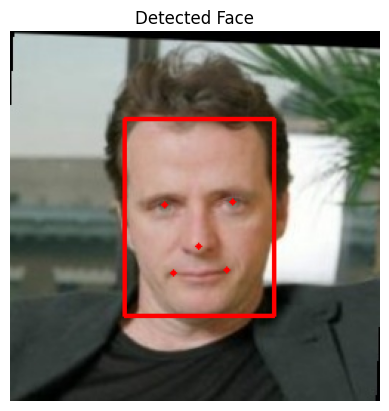

In [9]:
from matplotlib import pyplot as plt

# extract the bbox coordinates
bbox = faces[0].bbox
x1, y1, x2, y2 = map(int, bbox)

# Draw the bbox on the image
cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Draw keypoints
for (x, y) in face.kps:
    cv2.circle(image, (int(x), int(y)), 2, (0, 0, 255), -1)

# BGR → RGB for correct color rendering in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.title("Detected Face")
plt.show()